In [25]:
import nibabel as nb
import numpy as np
import pandas as pd 
import time
import matplotlib.pyplot as plt
from nilearn import plotting
from fragmenter import Fragment
from fragmenter import adjacency

This will be a simple analysis of the performance of the algorithms used for parcellation. This includes computing the speed of each, as well as checking the variation of the parcellations n number of times (this can be projected as an adjacency matrix where the color intensity is given by the Jaccard index--like in the corr vs comm one I did). A simple speed vs variance figure would be useful. Also add the kind of figure that Miykael has on the readme. 

In [ ]:
# Prep the surface and fragmentation object
testSurface = nb.freesurfer.read_geometry(
    '/Users/Claudio/Desktop/parcellation_fragmenter-modularization/freesurfer/fsaverage/surf/rh.inflated'
)

# Set up cluster sizes (log better?)
# clustSize = [5,50,150,300]
clustSize = np.round(np.logspace(1,3, num=20))
clustSize = clustSize.astype(int)
methods = ['gmm', 'k_means', 'ward']

tottime = []
allLabels = []

for cluster in clustSize:
    print('Current cluster: ' + str(cluster))
    testFragment = Fragment.Fragment(n_clusters=cluster)
    for method in methods:
        print('Current method: ' + method)
        ST = time.time()
        testFragment.fit(testSurface[0], testSurface[1], method = method)
        allLabels.append(testFragment.label_)
        tottime.append(time.time() - ST)

In [17]:
timing = pd.DataFrame(dict(size=np.repeat(clustSize, len(methods)), 
                           method= methods * len(clustSize),
                          time = tottime))

In [27]:
from ggplot import *

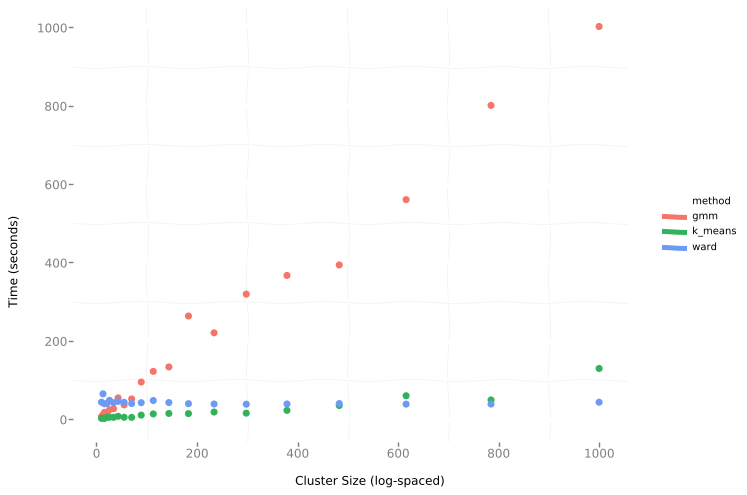

<ggplot: (-9223372036554786188)>

In [57]:
p = ggplot(aes(x='size', y='time', color = 'method'), data=timing) +\
geom_point(size = 50) +\
xlab('Cluster Size (log-spaced)') +\
ylab('Time (seconds)') +\
theme_bw()
p

In [60]:
A = asr

list